# Diagnostic of Linear Regression Model

In [10]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [11]:
housing = pd.read_csv('housing.csv', index_col='Unnamed: 0')

In [12]:
housing.head()

,LSTAT,INDUS,NOX,RM,MEDV
0,4.98,2.31,0.538,6.575,24.0
1,9.14,7.07,0.469,6.421,21.6
2,4.03,7.07,0.469,7.185,34.7
3,2.94,2.18,0.458,6.998,33.4
4,5.33,2.18,0.458,7.147,36.2


## Fitting the OLS model

ols == ordinary least squared method

In [15]:
model = smf.ols(formula='MEDV~LSTAT', data=housing).fit()

print(model.params)

Intercept    34.553841
LSTAT        -0.950049
dtype: float64


In [17]:
b0_ols = model.params[0]
b1_ols = model.params[1]

housing['BestResponse'] = b0_ols + b1_ols*housing['LSTAT']

In [18]:
housing.head()

,LSTAT,INDUS,NOX,RM,MEDV,BestResponse
0,4.98,2.31,0.538,6.575,24.0,29.822595
1,9.14,7.07,0.469,6.421,21.6,25.870390
2,4.03,7.07,0.469,7.185,34.7,30.725142
3,2.94,2.18,0.458,6.998,33.4,31.760696
4,5.33,2.18,0.458,7.147,36.2,29.490078


# Assumptions behind Linear Regression Model

1. Linearity

2. Independence

3. Normality

4. Equal Variance

# Linearity

We can check the scatter plot to have a fast check

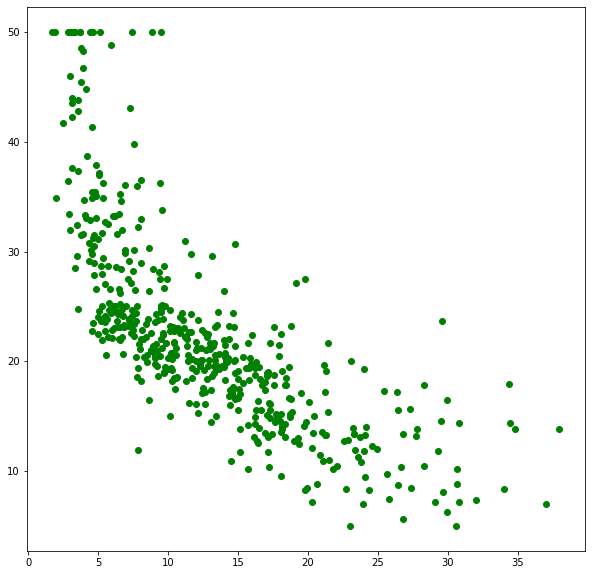

In [20]:
plt.figure(figsize=(10,10))
plt.scatter(housing['LSTAT'], housing['MEDV'], color='g')

# Independence

In [26]:
housing['Error'] = housing['MEDV'] - housing['BestResponse']
housing.head()

,LSTAT,INDUS,NOX,RM,MEDV,BestResponse,Error
0,4.98,2.31,0.538,6.575,24.0,29.822595,-5.822595
1,9.14,7.07,0.469,6.421,21.6,25.870390,-4.270390
2,4.03,7.07,0.469,7.185,34.7,30.725142,3.974858
3,2.94,2.18,0.458,6.998,33.4,31.760696,1.639304
4,5.33,2.18,0.458,7.147,36.2,29.490078,6.709922


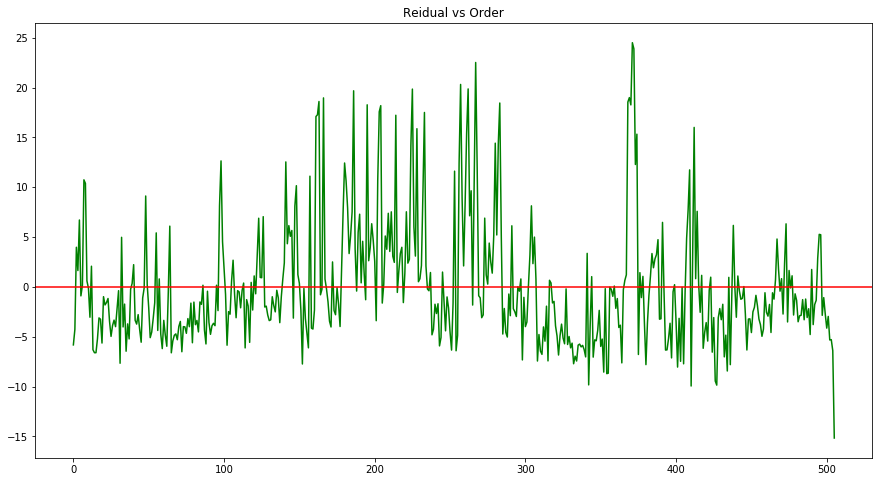

In [30]:
plt.figure(figsize=(15,8))
plt.title('Reidual vs Order')
plt.plot(housing['Error'], color='green')
plt.axhline(y=0, color='red')
plt.show()

## Durbin Watson Test

Check the Durbin Watson statistic

Rule of thumb: test statistic value in the range of 1.5 to 2.5 are relatively normal

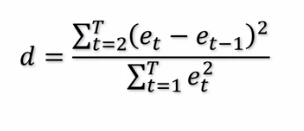

In [33]:
from IPython.display import Image
Image(filename='Durbin Watson test.PNG')

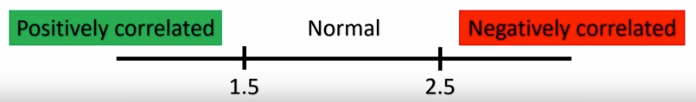

In [34]:
Image(filename='dub stat.PNG')

In [35]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sat, 25 Apr 2020   Prob (F-statistic):           5.08e-88
Time:                        19:24:58   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
LSTAT         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Normality

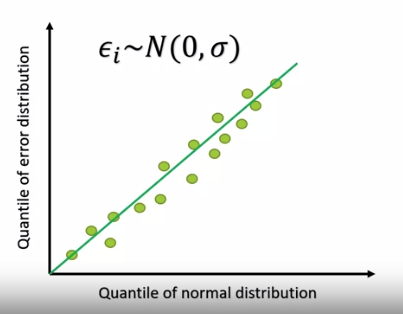

In [38]:
Image(filename='normality.PNG')

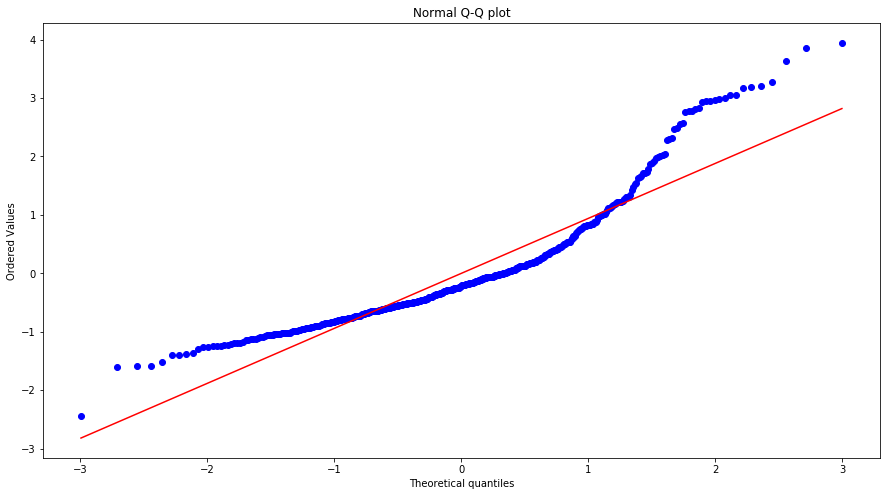

In [37]:
import scipy.stats as stats
z = (housing['Error'] - housing['Error'].mean())/housing['Error'].std(ddof=1)

plt.figure(figsize=(15,8))
stats.probplot(z, dist='norm', plot=plt)
#to compare your distribution errr woth normal distribution
plt.title('Normal Q-Q plot')
plt.show()

# Equal Variance

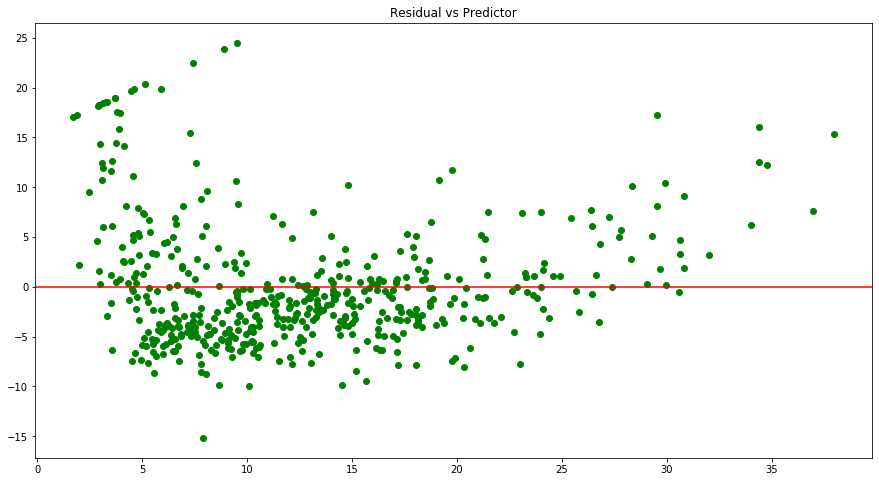

In [40]:
#Residual vs Predictor plot
plt.figure(figsize=(15,8))
plt.title('Residual vs Predictor')
plt.scatter(housing['LSTAT'], housing['Error'], color='g')
plt.axhline(y=0, color='red')
plt.show()

If variance of noise is equal for different variance predictor, it should not have pattern.

## The regression model (MEDV~LSTAT) violates all four assumptions. Therefore, we cannot make statistical inference using this model.

## However, the model can still be applied to make a prediction. The accuracy and the consistency of your model, do not rely on these four assumptions.